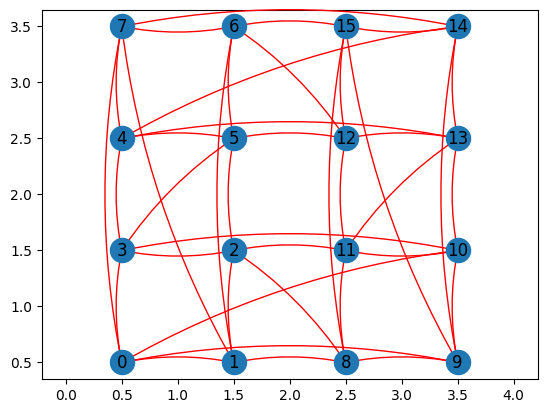

Exact ground-state energy E0 =  -7.425772452645837


In [9]:
import netket as nk
import numpy as np
import matplotlib.pyplot as plt

# 定义Shastry-Sutherland晶格
Lx = 2
Ly = 2

N=4*Lx*Ly

J1 = 0.8
J2 = 1.0
h = 0.0

# 定义自定义边
custom_edges = [
    (0, 1, [1.0, 0.0], 0),
    (1, 0, [1.0, 0.0], 0),
    (1, 2, [0.0, 1.0], 0),
    (2, 1, [0.0, 1.0], 0),
    (3, 2, [1.0, 0.0], 0),
    (2, 3, [1.0, 0.0], 0),
    (0, 3, [0.0, 1.0], 0),
    (3, 0, [0.0, 1.0], 0),
    (2, 0, [1.0, -1.0], 1),
    (3, 1, [1.0, 1.0], 1),
]

# 创建Shastry-Sutherland晶格
lattice = nk.graph.Lattice(
    basis_vectors=[[2.0, 0.0], [0.0, 2.0]],
    extent=(Lx, Ly),
    site_offsets=[[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]],
    custom_edges=custom_edges,
    pbc=[True, True]
)

# 绘制并可视化晶格图
lattice.draw(edge_color='red', curvature=0.1)
plt.show()

# 定义Hilbert空间，自旋基和总磁化为零的扇区
hi = nk.hilbert.Spin(s=1/2, N=lattice.n_nodes, total_sz=0)

# 定义自旋-1/2矩阵
sigmax = [[0, 0.5], [0.5, 0]]
sigmay = [[0, -0.5j], [0.5j, 0]]
sigmaz = [[0.5, 0], [0, -0.5]]
unitm = [[1.0, 0.0], [0.0, 1.0]]

sxsx = np.kron(sigmax, sigmax)
sysy = np.kron(sigmay, sigmay)
szsz = np.kron(sigmaz, sigmaz)
umum = np.kron(unitm, unitm)

SiSj = sxsx + sysy + szsz


# 定义键和位点算符
bond_operator = [
    (J1 * SiSj).tolist(),
    (J2 * SiSj).tolist(),
]

bond_color = [0, 1]

site_operator = [(-h * np.array(sigmaz)).tolist()]

# 构建Hamiltonian
H = nk.operator.GraphOperator(hi, graph=lattice, bond_ops=bond_operator, bond_ops_colors=bond_color, site_ops=site_operator)



# 使用Lanczos算法计算哈密顿量的本征值和本征向量
# evals, evecs = nk.exact.lanczos_ed(hamiltonian, compute_eigenvectors=True)
evals = nk.exact.lanczos_ed(H, compute_eigenvectors=False)

# 输出基态能量
print('Exact ground-state energy E0 = ', evals[0])  # 基态能量除以四是因为netket里用的泡利矩，缺少1/2常数，两个相互作用就是1/4